## Sky Background Dependence of HSM Module Shapelet Algorithms


Originally created by Alex Broughton


In [4]:
! eups list -s | grep lsst_distrib

lsst_distrib          g0b29ad24fb+d238567eb0 	current w_latest w_2022_45 setup


In [5]:
# Helper functions
import sys
import os
import math
import logging
import galsim
import numpy as np
import matplotlib.pyplot as plt

def calc2ndMom(results):
    # Calculate Second Moments
    e1 = results.observed_shape.e1
    e2 = results.observed_shape.e2
    sigma = results.moments_sigma
    sigma_ave = sigma / (1 - e1**2 - e2**2 )**(0.25) 
    Ixx = (1+e1) * sigma_ave**2
    Iyy = (1-e1) * sigma_ave**2
    Ixy = e2 * (sigma_ave**2) 
    
    return Ixx, Iyy, Ixy

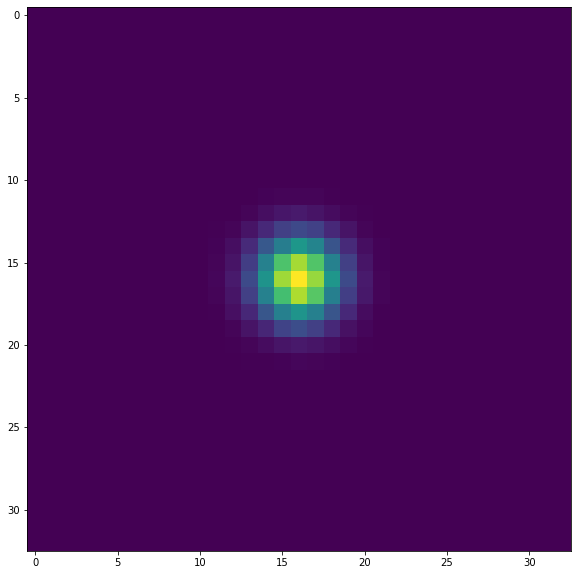

In [6]:
# 0.2 arsec / 10um pixel
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)

blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=1, method="phot", save_photons=True)

plt.figure(figsize=(10,10))
plt.imshow(star_image.array)
results = star_image.FindAdaptiveMom()
IXX_0, IYY_0, IXY_0 = calc2ndMom(results)


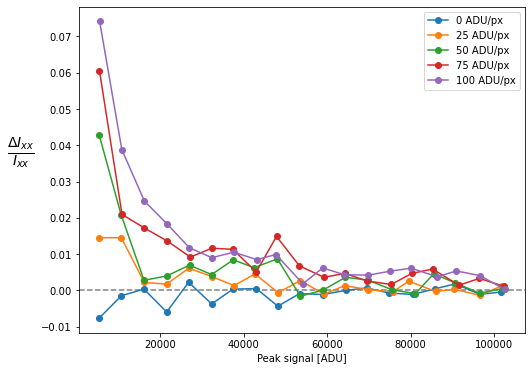

In [9]:
# FWHM = 4px
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)
  
    
stamps = []
sky = []
for n in range(5):
    for t in range(1,20):
        # draw image
        blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
        star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=t, method="phot", save_photons=True)

        star_image += 25*n
        sky.append(25*n)

        stamps.append(star_image)


# calculate HSM moments (these are in pixel coordinates)
Ixx, Iyy, Ixy = [],[],[]
fluxes = []
peakSignal = []

for stamp in stamps:
    results = stamp.FindAdaptiveMom(strict=False)
    Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
    Ixx.append(Ixx_)
    Iyy.append(Iyy_)
    Ixy.append(Ixy_)
    fluxes.append(results.moments_amp)
    peakSignal.append(np.max(stamp.array))

    
sky = np.asarray(sky)
stamps = np.asarray(stamps)
fluxes = np.asarray(fluxes)
peakSignal = np.asarray(peakSignal)
Ixx = np.asarray(Ixx)
Iyy = np.asarray(Iyy)
Ixy = np.asarray(Ixy)

# plot it
plt.figure(figsize=(8,6))
plt.axhline(0,color="k",linestyle="--", alpha=0.5)
for n in range(5):
    plt.plot(peakSignal[sky==25*n], (Ixx[sky==25*n] - IXX_0) / IXX_0, "o-", label=str(25*n) + " ADU/px")
plt.xlabel("Peak signal [ADU]")
plt.ylabel(r"$\frac{\Delta I_{xx}}{I_{xx}}$", fontsize=20, labelpad=20,rotation=0)
plt.legend()


More Statistics

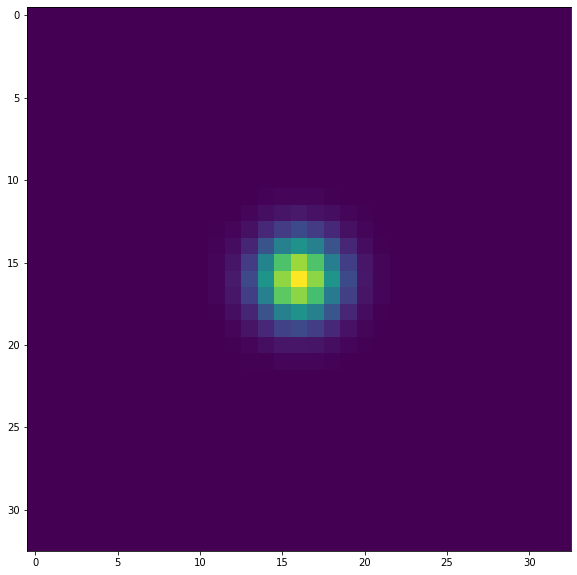

In [10]:
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)

blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=1, method="phot", save_photons=True)

Ixx = []
Iyy = []
Ixy = []
for n in range(100):
    # Add noise
    # random seed
    image = galsim.Image(star_image, copy=True)
    rng = galsim.BaseDeviate(n)
    noise = galsim.GaussianNoise(rng, sigma=5.0)
    image.addNoise(noise)
    results = image.FindAdaptiveMom()
    Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
    
    Ixx.append(Ixx_)
    Iyy.append(Iyy_)
    Ixy.append(Ixy_)
    



plt.figure(figsize=(10,10))
plt.imshow(star_image.array)
IXX_0, IYY_0, IXY_0 = np.mean(Ixx), np.mean(Iyy), np.mean(Ixy)
IXX_0_err, IYY_0_err, IXY_0_err = np.std(Ixx), np.std(Iyy), np.std(Ixy)

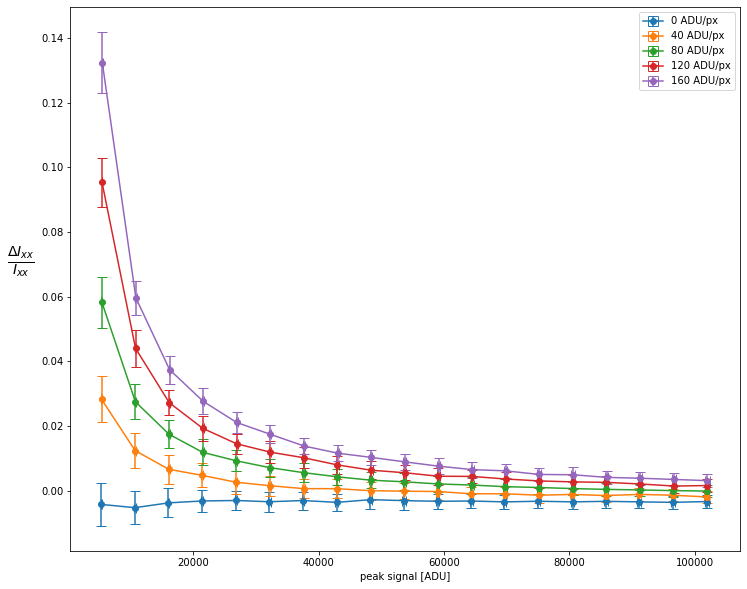

In [11]:
# FWHM = 4px
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)
  

sky = []
Ixx, Iyy, Ixy = [],[],[]
Ixx_err, Iyy_err, Ixy_err = [],[],[]
fluxes = []
fluxes_err = []
peakSignal = []
peakSignal_err = []


for n in range(5):
    for t in range(1,20):
        Ixx_temp = []
        Iyy_temp = []
        Ixy_temp = []
        fluxes_temp = []
        peakSignal_temp = []
        
        for i in range(100):
            # random seed
            rng = galsim.BaseDeviate(i)

            # Get image
            blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
            star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=t, method="phot", save_photons=True)
            
            # add sky background
            star_image += 40*n

            # generate noise and add to image
            noise = galsim.GaussianNoise(rng, sigma=5.0)
            star_image.addNoise(noise)

            # calculate HSM moments (these are in pixel coordinates)
            results = star_image.FindAdaptiveMom(strict=True)
            Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
            Ixx_temp.append(Ixx_)
            Iyy_temp.append(Iyy_)
            Ixy_temp.append(Ixy_)
            fluxes_temp.append(results.moments_amp)
            peakSignal_temp.append(np.max(star_image.array))
            

        # Store data    
        Ixx.append( np.mean(Ixx_temp) )
        Ixx_err.append( np.std(Ixx_temp) )
        
        Iyy.append( np.mean(Iyy_temp) )
        Iyy_err.append( np.std(Iyy_temp) )
        
        Ixy.append( np.mean(Ixy_temp) )
        Ixy_err.append( np.std(Ixy_temp) )

        fluxes.append( np.mean(fluxes_temp) )
        fluxes_err.append( np.std(fluxes_temp) )
        
        peakSignal.append( np.mean(peakSignal_temp) )
        peakSignal_err.append( np.std(peakSignal_temp) )
        
        sky.append(25*n)

#print(len(peakSignal))
    
sky = np.asarray(sky)
fluxes = np.asarray(fluxes)
fluxes_err = np.asarray(fluxes_err)
peakSignal = np.asarray(peakSignal)
peakSignal_err = np.asarray(peakSignal_err)
Ixx = np.asarray(Ixx)
Ixx_err = np.asarray(Ixx_err)
Iyy = np.asarray(Iyy)
Iyy_err = np.asarray(Iyy_err)
Ixy = np.asarray(Ixy)
Ixy_err = np.asarray(Ixy_err)

# plot it
plt.figure(figsize=(12,10))
yerr = np.sqrt( ((1. / IXX_0) * Ixx_err)**2 + (-(Ixx / IXX_0**2) * IXX_0_err)**2)

for n in range(5):
    plt.errorbar(peakSignal[sky==25*n], (Ixx[sky==25*n] - IXX_0) / IXX_0, xerr=peakSignal_err[sky==25*n], yerr=yerr[sky==25*n], fmt="o-",capsize=5,label=str(40*n) + " ADU/px")
plt.xlabel("peak signal [ADU]")
plt.ylabel(r"$\frac{\Delta I_{xx}}{I_{xx}}$", fontsize=20, labelpad=20,rotation=0)
plt.legend()


Archival

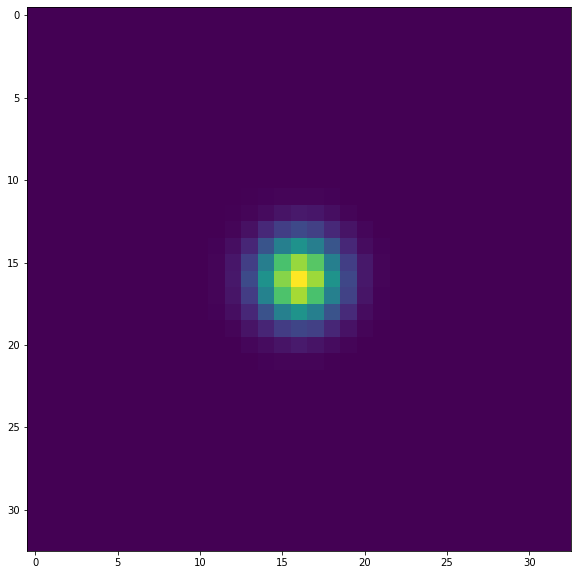

In [3]:
# 0.2 arsec / 10um pixel
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)

blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=1, method="phot", save_photons=True)

plt.figure(figsize=(10,10))
plt.imshow(star_image.array)
results = star_image.FindAdaptiveMom()
IXX_0, IYY_0, IXY_0 = calc2ndMom(results)


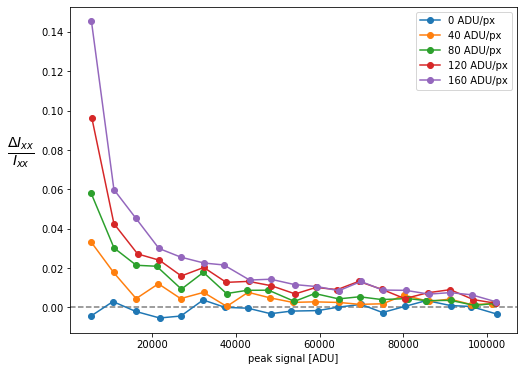

In [4]:
# FWHM = 4px
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)
  
    
stamps = []
sky = []
for n in range(5):
    for t in range(1,20):
        # draw image
        blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
        star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=t, method="phot", save_photons=True)

        star_image += 40*n
        sky.append(40*n)

        stamps.append(star_image)


# calculate HSM moments (these are in pixel coordinates)
Ixx, Iyy, Ixy = [],[],[]
fluxes = []
peakSignal = []

for stamp in stamps:
    results = stamp.FindAdaptiveMom(strict=False)
    Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
    Ixx.append(Ixx_)
    Iyy.append(Iyy_)
    Ixy.append(Ixy_)
    fluxes.append(results.moments_amp)
    peakSignal.append(np.max(stamp.array))

    
sky = np.asarray(sky)
stamps = np.asarray(stamps)
fluxes = np.asarray(fluxes)
peakSignal = np.asarray(peakSignal)
Ixx = np.asarray(Ixx)
Iyy = np.asarray(Iyy)
Ixy = np.asarray(Ixy)

# plot it
plt.figure(figsize=(8,6))
plt.axhline(0,color="k",linestyle="--", alpha=0.5)
for n in range(5):
    plt.plot(peakSignal[sky==40*n], (Ixx[sky==40*n] - IXX_0) / IXX_0, "o-", label=str(40*n) + " ADU/px")
plt.xlabel("peak signal [ADU]")
plt.ylabel(r"$\frac{\Delta I_{xx}}{I_{xx}}$", fontsize=20, labelpad=20,rotation=0)
plt.legend()


/tmp/ipykernel_36913/2699988539.py:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.asarray(p)/np.asarray(x), np.asarray(y), "o--", markersize=5)


Text(0.5, 0, 'peak signal / sky level ')

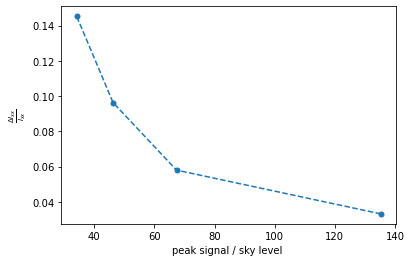

In [5]:
x, y, p = [], [], []
for n in range(5):
    x.append(40*n)
    p.append(peakSignal[sky==40*n][0])
    y.append((Ixx[sky==40*n][0] - IXX_0) / IXX_0)

plt.plot(np.asarray(p)/np.asarray(x), np.asarray(y), "o--", markersize=5)
plt.ylabel(r"$\frac{\Delta I_{xx}}{I_{xx}}$")
plt.xlabel("peak signal / sky level ")

## Adding more statistics

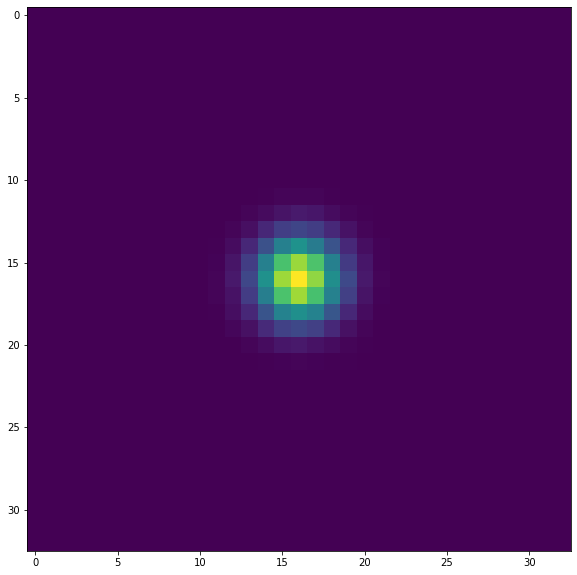

In [6]:
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)

blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=1, method="phot", save_photons=True)

Ixx = []
Iyy = []
Ixy = []
for n in range(100):
    # Add noise
    # random seed
    image = galsim.Image(star_image, copy=True)
    rng = galsim.BaseDeviate(n)
    noise = galsim.GaussianNoise(rng, sigma=5.0)
    image.addNoise(noise)
    results = image.FindAdaptiveMom()
    Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
    
    Ixx.append(Ixx_)
    Iyy.append(Iyy_)
    Ixy.append(Ixy_)
    



plt.figure(figsize=(10,10))
plt.imshow(star_image.array)
IXX_0, IYY_0, IXY_0 = np.mean(Ixx), np.mean(Iyy), np.mean(Ixy)
IXX_0_err, IYY_0_err, IXY_0_err = np.std(Ixx), np.std(Iyy), np.std(Ixy)

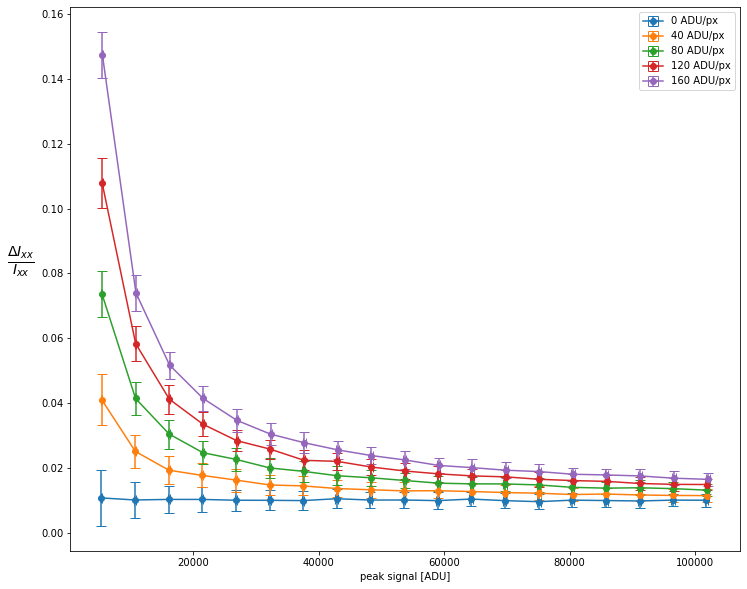

In [7]:
# FWHM = 4px
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)
  

sky = []
Ixx, Iyy, Ixy = [],[],[]
Ixx_err, Iyy_err, Ixy_err = [],[],[]
fluxes = []
fluxes_err = []
peakSignal = []
peakSignal_err = []


for n in range(5):
    for t in range(1,20):
        Ixx_temp = []
        Iyy_temp = []
        Ixy_temp = []
        fluxes_temp = []
        peakSignal_temp = []
        
        for i in range(100):
            # random seed
            rng = galsim.BaseDeviate(i)

            # Get image
            blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
            star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=t, method="phot", save_photons=True)
            
            # add sky background
            star_image += 40*n

            # generate noise and add to image
            noise = galsim.GaussianNoise(rng, sigma=5.0)
            star_image.addNoise(noise)

            # calculate HSM moments (these are in pixel coordinates)
            results = star_image.FindAdaptiveMom(strict=True)
            Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
            Ixx_temp.append(Ixx_)
            Iyy_temp.append(Iyy_)
            Ixy_temp.append(Ixy_)
            fluxes_temp.append(results.moments_amp)
            peakSignal_temp.append(np.max(star_image.array))
            

        # Store data    
        Ixx.append( np.mean(Ixx_temp) )
        Ixx_err.append( np.std(Ixx_temp) )
        
        Iyy.append( np.mean(Iyy_temp) )
        Iyy_err.append( np.std(Iyy_temp) )
        
        Ixy.append( np.mean(Ixy_temp) )
        Ixy_err.append( np.std(Ixy_temp) )

        fluxes.append( np.mean(fluxes_temp) )
        fluxes_err.append( np.std(fluxes_temp) )
        
        peakSignal.append( np.mean(peakSignal_temp) )
        peakSignal_err.append( np.std(peakSignal_temp) )
        
        sky.append(40*n)

#print(len(peakSignal))
    
sky = np.asarray(sky)
fluxes = np.asarray(fluxes)
fluxes_err = np.asarray(fluxes_err)
peakSignal = np.asarray(peakSignal)
peakSignal_err = np.asarray(peakSignal_err)
Ixx = np.asarray(Ixx)
Ixx_err = np.asarray(Ixx_err)
Iyy = np.asarray(Iyy)
Iyy_err = np.asarray(Iyy_err)
Ixy = np.asarray(Ixy)
Ixy_err = np.asarray(Ixy_err)

# plot it
plt.figure(figsize=(12,10))
yerr = np.sqrt( ((1. / IXX_0) * Ixx_err)**2 + (-(Ixx / IXX_0**2) * IXX_0_err)**2)

for n in range(5):
    plt.errorbar(peakSignal[sky==40*n], (Ixx[sky==40*n] - IXX_0) / IXX_0, xerr=peakSignal_err[sky==40*n], yerr=yerr[sky==40*n], fmt="o-",capsize=5,label=str(40*n) + " ADU/px")
plt.xlabel("peak signal [ADU]")
plt.ylabel(r"$\frac{\Delta I_{xx}}{I_{xx}}$", fontsize=20, labelpad=20,rotation=0)
plt.legend()


## 20x20 image

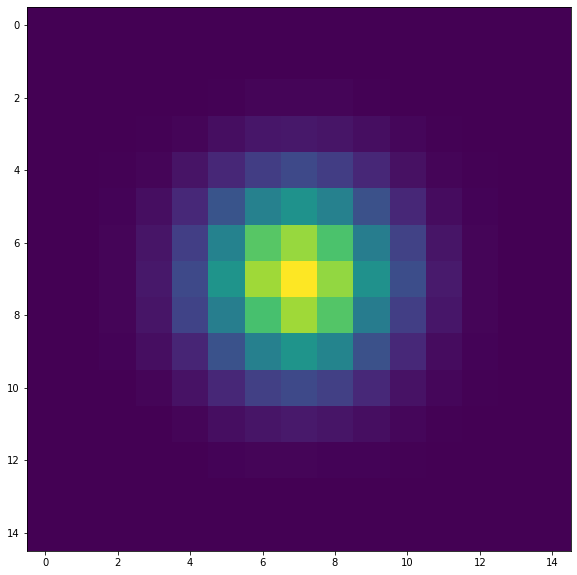

In [12]:
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)

blank_image = galsim.Image(15,15,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=1, method="phot", save_photons=True)

Ixx = []
Iyy = []
Ixy = []
for n in range(100):
    # Add noise
    # random seed
    image = galsim.Image(star_image, copy=True)
    rng = galsim.BaseDeviate(n)
    noise = galsim.GaussianNoise(rng, sigma=5.0)
    image.addNoise(noise)
    results = image.FindAdaptiveMom()
    Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
    
    Ixx.append(Ixx_)
    Iyy.append(Iyy_)
    Ixy.append(Ixy_)
    



plt.figure(figsize=(10,10))
plt.imshow(star_image.array)
IXX_0, IYY_0, IXY_0 = np.mean(Ixx), np.mean(Iyy), np.mean(Ixy)
IXX_0_err, IYY_0_err, IXY_0_err = np.std(Ixx), np.std(Iyy), np.std(Ixy)

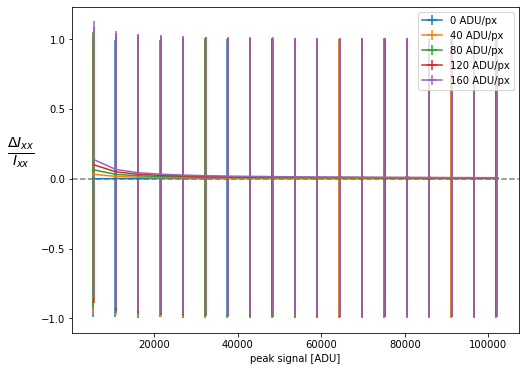

In [13]:
# FWHM = 4px
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)
  

sky = []
Ixx, Iyy, Ixy = [],[],[]
Ixx_err, Iyy_err, Ixy_err = [],[],[]
fluxes = []
fluxes_err = []
peakSignal = []
peakSignal_err = []


for n in range(5):
    for t in range(1,20):
        Ixx_temp = []
        Iyy_temp = []
        Ixy_temp = []
        fluxes_temp = []
        peakSignal_temp = []
        
        for i in range(100):
            # random seed
            rng = galsim.BaseDeviate(i)

            # Get image
            blank_image = galsim.Image(15,15,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
            star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=t, method="phot", save_photons=True)
            
            # add sky background
            star_image += 40*n

            # generate noise and add to image
            noise = galsim.CCDNoise(rng, gain=1.0, read_noise=5.0, sky_level=0.0)
            star_image.addNoise(noise)

            # calculate HSM moments (these are in pixel coordinates)
            results = star_image.FindAdaptiveMom(strict=True)
            Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
            Ixx_temp.append(Ixx_)
            Iyy_temp.append(Iyy_)
            Ixy_temp.append(Ixy_)
            fluxes_temp.append(results.moments_amp)
            peakSignal_temp.append(np.max(star_image.array))
            

        # Store data    
        Ixx.append( np.mean(Ixx_temp) )
        Ixx_err.append( np.std(Ixx_temp) )
        
        Iyy.append( np.mean(Iyy_temp) )
        Iyy_err.append( np.std(Iyy_temp) )
        
        Ixy.append( np.mean(Ixy_temp) )
        Ixy_err.append( np.std(Ixy_temp) )

        fluxes.append( np.mean(fluxes_temp) )
        fluxes_err.append( np.std(fluxes_temp) )
        
        peakSignal.append( np.mean(peakSignal_temp) )
        peakSignal_err.append( np.std(peakSignal_temp) )
        
        sky.append(40*n)

#print(len(peakSignal))
    
sky = np.asarray(sky)
fluxes = np.asarray(fluxes)
fluxes_err = np.asarray(fluxes_err)
peakSignal = np.asarray(peakSignal)
peakSignal_err = np.asarray(peakSignal_err)
Ixx = np.asarray(Ixx)
Ixx_err = np.asarray(Ixx_err)
Iyy = np.asarray(Iyy)
Iyy_err = np.asarray(Iyy_err)
Ixy = np.asarray(Ixy)
Ixy_err = np.asarray(Ixy_err)

# plot it
plt.figure(figsize=(8,6))
plt.axhline(0,color="k",linestyle="--", alpha=0.5)

yerr = np.sqrt( ((1. / IXX_0) * Ixx_err)**2 + (-(Ixx / IXX_0**2) * IXX_0_err)**2)
yerr = (Ixx_err - IXX_0) / IXX_0

for n in range(5):
    #print(peakSignal[sky==40*n])
    #print((Ixx[sky==40*n] - IXX_0) / IXX_0)
    plt.errorbar(peakSignal[sky==40*n], (Ixx[sky==40*n] - IXX_0) / IXX_0, xerr=peakSignal_err[sky==40*n], yerr=yerr[sky==40*n], label=str(40*n) + " ADU/px")
plt.xlabel("peak signal [ADU]")
plt.ylabel(r"$\frac{\Delta I_{xx}}{I_{xx}}$", fontsize=20, labelpad=20,rotation=0)
plt.legend()


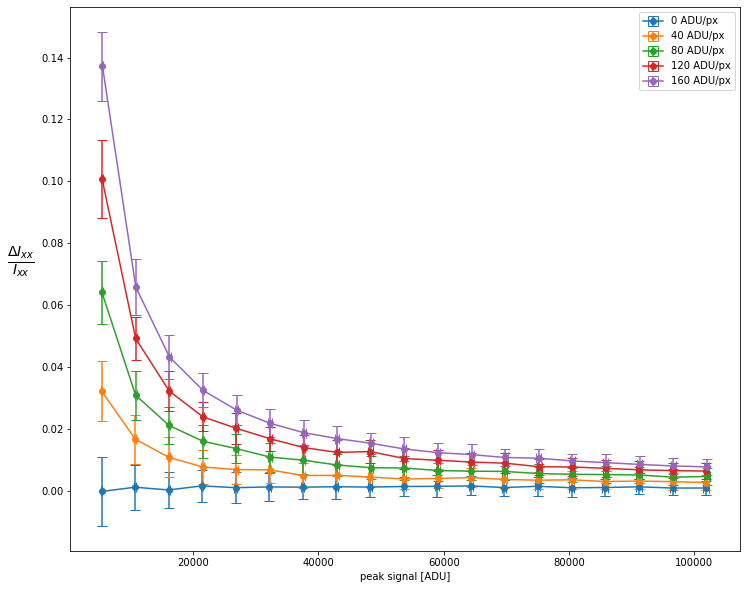

In [14]:
# plot it
plt.figure(figsize=(12,10))
yerr = np.sqrt( ((1. / IXX_0) * Ixx_err)**2 + (-(Ixx / IXX_0**2) * IXX_0_err)**2)

for n in range(5):
    plt.errorbar(peakSignal[sky==40*n], (Ixx[sky==40*n] - IXX_0) / IXX_0, xerr=peakSignal_err[sky==40*n], yerr=yerr[sky==40*n], fmt="o-",capsize=5,label=str(40*n) + " ADU/px")
plt.xlabel("peak signal [ADU]")
plt.ylabel(r"$\frac{\Delta I_{xx}}{I_{xx}}$", fontsize=20, labelpad=20,rotation=0)
plt.legend()


### Nsig_rg = 2 sigma

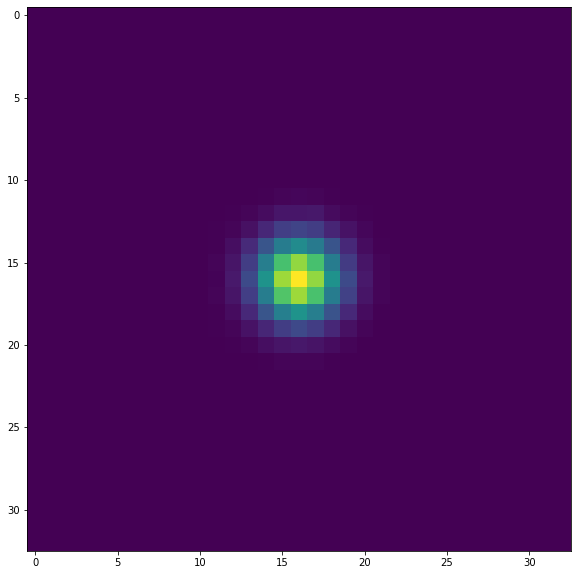

In [23]:
params = galsim.hsm.HSMParams(nsig_rg = 2)

pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)

blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=1, method="phot", save_photons=True)

Ixx = []
Iyy = []
Ixy = []
for n in range(100):
    # Add noise
    # random seed
    image = galsim.Image(star_image, copy=True)
    rng = galsim.BaseDeviate(n)
    noise = galsim.GaussianNoise(rng, sigma=5.0)
    image.addNoise(noise)
    results = image.FindAdaptiveMom(hsmparams = params, strict = True)
    Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
    
    Ixx.append(Ixx_)
    Iyy.append(Iyy_)
    Ixy.append(Ixy_)
    



plt.figure(figsize=(10,10))
plt.imshow(star_image.array)
IXX_0, IYY_0, IXY_0 = np.mean(Ixx), np.mean(Iyy), np.mean(Ixy)
IXX_0_err, IYY_0_err, IXY_0_err = np.std(Ixx), np.std(Iyy), np.std(Ixy)

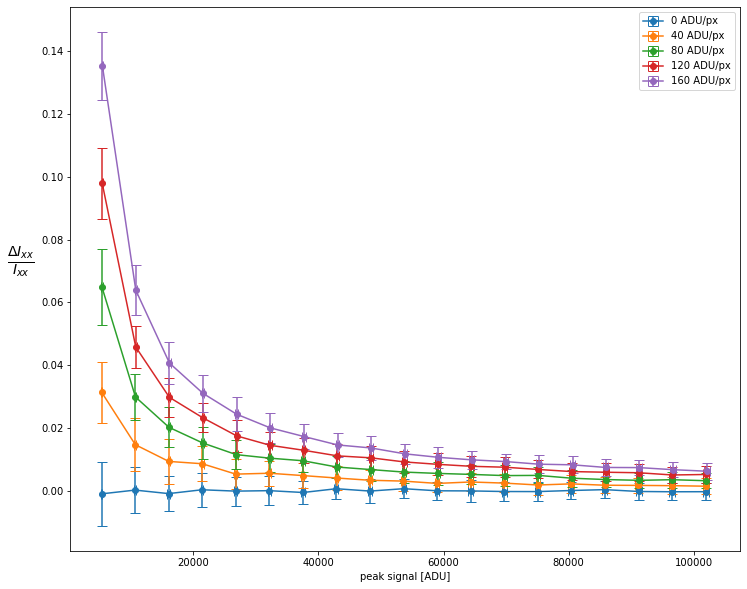

In [24]:
# FWHM = 4px
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)
  

sky = []
Ixx, Iyy, Ixy = [],[],[]
Ixx_err, Iyy_err, Ixy_err = [],[],[]
fluxes = []
fluxes_err = []
peakSignal = []
peakSignal_err = []


for n in range(5):
    for t in range(1,20):
        Ixx_temp = []
        Iyy_temp = []
        Ixy_temp = []
        fluxes_temp = []
        peakSignal_temp = []
        
        for i in range(100):
            # random seed
            rng = galsim.BaseDeviate(i)

            # Get image
            blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
            star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=t, method="phot", save_photons=True)
            
            # add sky background
            star_image += 40*n

            # generate noise and add to image
            noise = galsim.CCDNoise(rng, gain=1.0, read_noise=5.0, sky_level=0.0)
            star_image.addNoise(noise)

            # calculate HSM moments (these are in pixel coordinates)
            results = star_image.FindAdaptiveMom(hsmparams = params, strict=True)
            Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
            Ixx_temp.append(Ixx_)
            Iyy_temp.append(Iyy_)
            Ixy_temp.append(Ixy_)
            fluxes_temp.append(results.moments_amp)
            peakSignal_temp.append(np.max(star_image.array))
            

        # Store data    
        Ixx.append( np.mean(Ixx_temp) )
        Ixx_err.append( np.std(Ixx_temp) )
        
        Iyy.append( np.mean(Iyy_temp) )
        Iyy_err.append( np.std(Iyy_temp) )
        
        Ixy.append( np.mean(Ixy_temp) )
        Ixy_err.append( np.std(Ixy_temp) )

        fluxes.append( np.mean(fluxes_temp) )
        fluxes_err.append( np.std(fluxes_temp) )
        
        peakSignal.append( np.mean(peakSignal_temp) )
        peakSignal_err.append( np.std(peakSignal_temp) )
        
        sky.append(40*n)

#print(len(peakSignal))
    
sky = np.asarray(sky)
fluxes = np.asarray(fluxes)
fluxes_err = np.asarray(fluxes_err)
peakSignal = np.asarray(peakSignal)
peakSignal_err = np.asarray(peakSignal_err)
Ixx = np.asarray(Ixx)
Ixx_err = np.asarray(Ixx_err)
Iyy = np.asarray(Iyy)
Iyy_err = np.asarray(Iyy_err)
Ixy = np.asarray(Ixy)
Ixy_err = np.asarray(Ixy_err)

# plot it
plt.figure(figsize=(12,10))
yerr = np.sqrt( ((1. / IXX_0) * Ixx_err)**2 + (-(Ixx / IXX_0**2) * IXX_0_err)**2)

for n in range(5):
    plt.errorbar(peakSignal[sky==40*n], (Ixx[sky==40*n] - IXX_0) / IXX_0, xerr=peakSignal_err[sky==40*n], yerr=yerr[sky==40*n], fmt="o-",capsize=5,label=str(40*n) + " ADU/px")
plt.xlabel("peak signal [ADU]")
plt.ylabel(r"$\frac{\Delta I_{xx}}{I_{xx}}$", fontsize=20, labelpad=20,rotation=0)
plt.legend()



### 15x15 pixel array


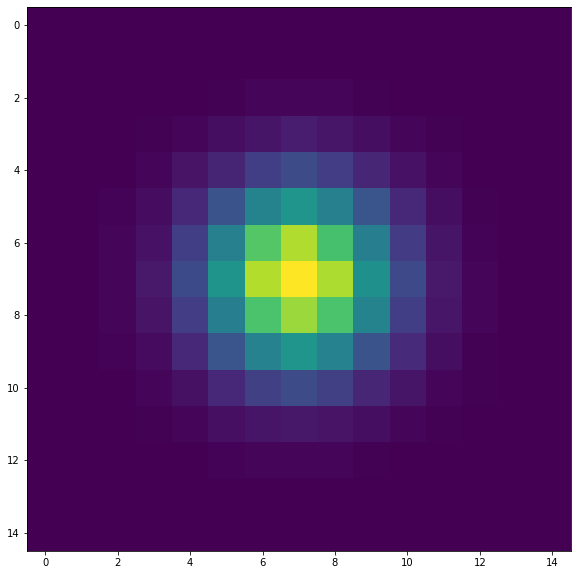

In [25]:
params = galsim.hsm.HSMParams(nsig_rg = 2)

pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)

blank_image = galsim.Image(15,15,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=1, method="phot", save_photons=True)

Ixx = []
Iyy = []
Ixy = []
for n in range(100):
    # Add noise
    # random seed
    image = galsim.Image(star_image, copy=True)
    rng = galsim.BaseDeviate(n)
    noise = galsim.GaussianNoise(rng, sigma=5.0)
    image.addNoise(noise)
    results = image.FindAdaptiveMom(hsmparams = params, strict = True)
    Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
    
    Ixx.append(Ixx_)
    Iyy.append(Iyy_)
    Ixy.append(Ixy_)
    



plt.figure(figsize=(10,10))
plt.imshow(star_image.array)
IXX_0, IYY_0, IXY_0 = np.mean(Ixx), np.mean(Iyy), np.mean(Ixy)
IXX_0_err, IYY_0_err, IXY_0_err = np.std(Ixx), np.std(Iyy), np.std(Ixy)

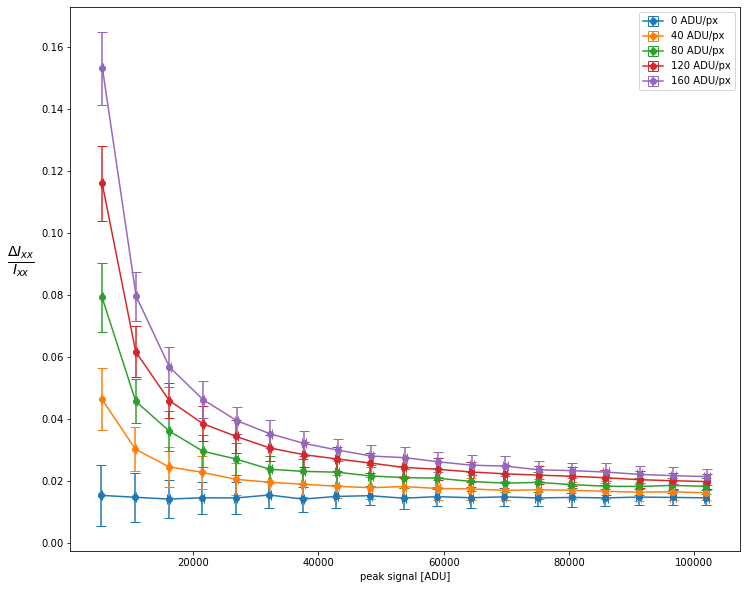

In [26]:
# FWHM = 4px
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)
  

sky = []
Ixx, Iyy, Ixy = [],[],[]
Ixx_err, Iyy_err, Ixy_err = [],[],[]
fluxes = []
fluxes_err = []
peakSignal = []
peakSignal_err = []


for n in range(5):
    for t in range(1,20):
        Ixx_temp = []
        Iyy_temp = []
        Ixy_temp = []
        fluxes_temp = []
        peakSignal_temp = []
        
        for i in range(100):
            # random seed
            rng = galsim.BaseDeviate(i)

            # Get image
            blank_image = galsim.Image(15,15,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
            star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=t, method="phot", save_photons=True)
            
            # add sky background
            star_image += 40*n

            # generate noise and add to image
            noise = galsim.CCDNoise(rng, gain=1.0, read_noise=5.0, sky_level=0.0)
            star_image.addNoise(noise)

            # calculate HSM moments (these are in pixel coordinates)
            results = star_image.FindAdaptiveMom(hsmparams = params, strict=True)
            Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
            Ixx_temp.append(Ixx_)
            Iyy_temp.append(Iyy_)
            Ixy_temp.append(Ixy_)
            fluxes_temp.append(results.moments_amp)
            peakSignal_temp.append(np.max(star_image.array))
            

        # Store data    
        Ixx.append( np.mean(Ixx_temp) )
        Ixx_err.append( np.std(Ixx_temp) )
        
        Iyy.append( np.mean(Iyy_temp) )
        Iyy_err.append( np.std(Iyy_temp) )
        
        Ixy.append( np.mean(Ixy_temp) )
        Ixy_err.append( np.std(Ixy_temp) )

        fluxes.append( np.mean(fluxes_temp) )
        fluxes_err.append( np.std(fluxes_temp) )
        
        peakSignal.append( np.mean(peakSignal_temp) )
        peakSignal_err.append( np.std(peakSignal_temp) )
        
        sky.append(40*n)

#print(len(peakSignal))
    
sky = np.asarray(sky)
fluxes = np.asarray(fluxes)
fluxes_err = np.asarray(fluxes_err)
peakSignal = np.asarray(peakSignal)
peakSignal_err = np.asarray(peakSignal_err)
Ixx = np.asarray(Ixx)
Ixx_err = np.asarray(Ixx_err)
Iyy = np.asarray(Iyy)
Iyy_err = np.asarray(Iyy_err)
Ixy = np.asarray(Ixy)
Ixy_err = np.asarray(Ixy_err)

# plot it
plt.figure(figsize=(12,10))
yerr = np.sqrt( ((1. / IXX_0) * Ixx_err)**2 + (-(Ixx / IXX_0**2) * IXX_0_err)**2)

for n in range(5):
    plt.errorbar(peakSignal[sky==40*n], (Ixx[sky==40*n] - IXX_0) / IXX_0, xerr=peakSignal_err[sky==40*n], yerr=yerr[sky==40*n], fmt="o-",capsize=5,label=str(40*n) + " ADU/px")
plt.xlabel("peak signal [ADU]")
plt.ylabel(r"$\frac{\Delta I_{xx}}{I_{xx}}$", fontsize=20, labelpad=20,rotation=0)
plt.legend()



### nsig_rg = 10

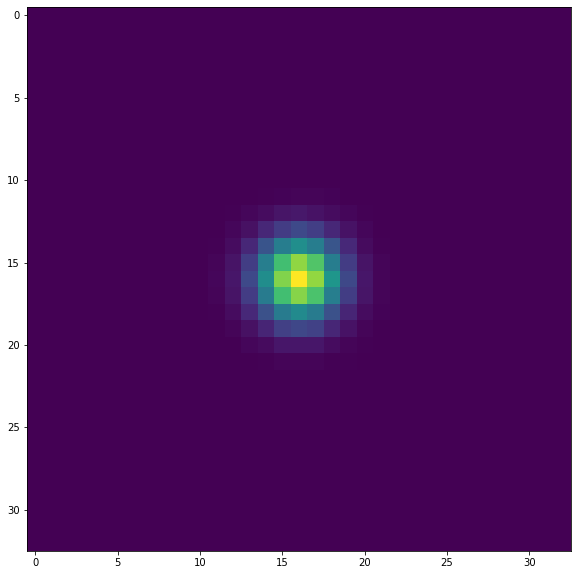

In [27]:
params = galsim.hsm.HSMParams(nsig_rg = 10)

pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)

blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=1, method="phot", save_photons=True)

Ixx = []
Iyy = []
Ixy = []
for n in range(100):
    # Add noise
    # random seed
    image = galsim.Image(star_image, copy=True)
    rng = galsim.BaseDeviate(n)
    noise = galsim.GaussianNoise(rng, sigma=5.0)
    image.addNoise(noise)
    results = image.FindAdaptiveMom(hsmparams = params, strict = True)
    Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
    
    Ixx.append(Ixx_)
    Iyy.append(Iyy_)
    Ixy.append(Ixy_)
    



plt.figure(figsize=(10,10))
plt.imshow(star_image.array)
IXX_0, IYY_0, IXY_0 = np.mean(Ixx), np.mean(Iyy), np.mean(Ixy)
IXX_0_err, IYY_0_err, IXY_0_err = np.std(Ixx), np.std(Iyy), np.std(Ixy)

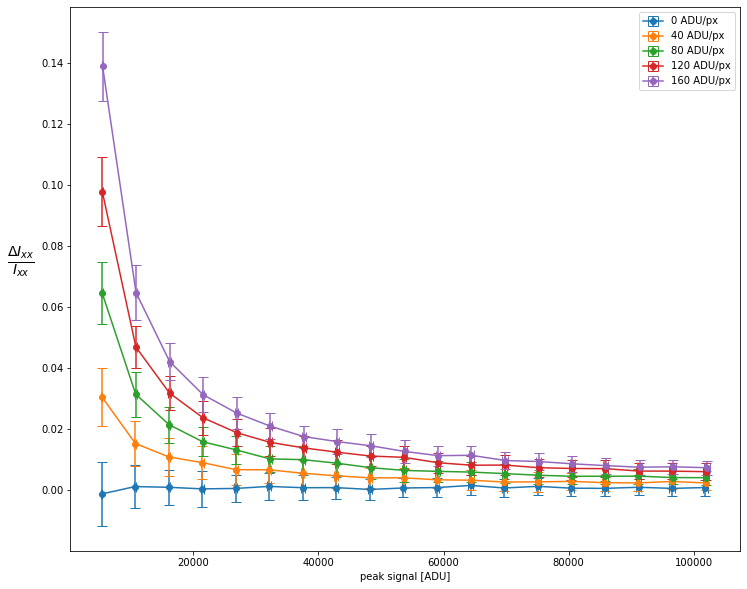

In [28]:
# FWHM = 4px
pixscale = 0.2/10.e-6
dprof = galsim.Gaussian(fwhm=40.0e-6*pixscale)

# Create a flat spectral energy density profile
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")

# Define the galaxy profile (returns instance of ChromaticObject)
chromatic_obj = dprof * sed

# Select a single wavelength in nm (returns instance of GSObject)
prof = chromatic_obj.evaluateAtWavelength(450.0).withFlux(1.0e5)
  

sky = []
Ixx, Iyy, Ixy = [],[],[]
Ixx_err, Iyy_err, Ixy_err = [],[],[]
fluxes = []
fluxes_err = []
peakSignal = []
peakSignal_err = []


for n in range(5):
    for t in range(1,20):
        Ixx_temp = []
        Iyy_temp = []
        Ixy_temp = []
        fluxes_temp = []
        peakSignal_temp = []
        
        for i in range(100):
            # random seed
            rng = galsim.BaseDeviate(i)

            # Get image
            blank_image = galsim.Image(33,33,scale=0.2,xmin=0,ymin=0,dtype=np.float64)
            star_image = prof.drawImage(image=blank_image, scale=0.2, exptime=t, method="phot", save_photons=True)
            
            # add sky background
            star_image += 40*n

            # generate noise and add to image
            noise = galsim.CCDNoise(rng, gain=1.0, read_noise=5.0, sky_level=0.0)
            star_image.addNoise(noise)

            # calculate HSM moments (these are in pixel coordinates)
            results = star_image.FindAdaptiveMom(hsmparams = params, strict=True)
            Ixx_, Iyy_, Ixy_ = calc2ndMom(results)
            Ixx_temp.append(Ixx_)
            Iyy_temp.append(Iyy_)
            Ixy_temp.append(Ixy_)
            fluxes_temp.append(results.moments_amp)
            peakSignal_temp.append(np.max(star_image.array))
            

        # Store data    
        Ixx.append( np.mean(Ixx_temp) )
        Ixx_err.append( np.std(Ixx_temp) )
        
        Iyy.append( np.mean(Iyy_temp) )
        Iyy_err.append( np.std(Iyy_temp) )
        
        Ixy.append( np.mean(Ixy_temp) )
        Ixy_err.append( np.std(Ixy_temp) )

        fluxes.append( np.mean(fluxes_temp) )
        fluxes_err.append( np.std(fluxes_temp) )
        
        peakSignal.append( np.mean(peakSignal_temp) )
        peakSignal_err.append( np.std(peakSignal_temp) )
        
        sky.append(40*n)

#print(len(peakSignal))
    
sky = np.asarray(sky)
fluxes = np.asarray(fluxes)
fluxes_err = np.asarray(fluxes_err)
peakSignal = np.asarray(peakSignal)
peakSignal_err = np.asarray(peakSignal_err)
Ixx = np.asarray(Ixx)
Ixx_err = np.asarray(Ixx_err)
Iyy = np.asarray(Iyy)
Iyy_err = np.asarray(Iyy_err)
Ixy = np.asarray(Ixy)
Ixy_err = np.asarray(Ixy_err)

# plot it
plt.figure(figsize=(12,10))
yerr = np.sqrt( ((1. / IXX_0) * Ixx_err)**2 + (-(Ixx / IXX_0**2) * IXX_0_err)**2)

for n in range(5):
    plt.errorbar(peakSignal[sky==40*n], (Ixx[sky==40*n] - IXX_0) / IXX_0, xerr=peakSignal_err[sky==40*n], yerr=yerr[sky==40*n], fmt="o-",capsize=5,label=str(40*n) + " ADU/px")
plt.xlabel("peak signal [ADU]")
plt.ylabel(r"$\frac{\Delta I_{xx}}{I_{xx}}$", fontsize=20, labelpad=20,rotation=0)
plt.legend()

